In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
ds=pd.read_excel('NormalizedStudent.xlsx')
del ds['Unnamed: 0']
ds = ds.assign(G12avg=ds.loc[:, ["G1", "G2"]].mean(axis=1))
ds

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G12avg
0,0,0,0.428571,1,0,0,1.00,1.00,0.00,1.00,...,0.50,0.75,0.00,0.00,0.50,0.080000,0.1250,0.315789,0.30,0.220395
1,0,0,0.285714,1,0,1,0.25,0.25,0.00,0.50,...,0.50,0.50,0.00,0.00,0.50,0.053333,0.1250,0.263158,0.30,0.194079
2,0,0,0.000000,1,1,1,0.25,0.25,0.00,0.50,...,0.50,0.25,0.25,0.50,0.50,0.133333,0.2500,0.421053,0.50,0.335526
3,0,0,0.000000,1,0,1,1.00,0.50,0.25,0.75,...,0.25,0.25,0.00,0.00,1.00,0.026667,0.7500,0.736842,0.75,0.743421
4,0,0,0.142857,1,0,1,0.75,0.75,0.50,0.50,...,0.50,0.25,0.00,0.25,1.00,0.053333,0.1875,0.526316,0.50,0.356908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,0.714286,1,1,0,0.50,0.50,0.75,0.75,...,1.00,0.75,0.75,1.00,0.75,0.146667,0.3750,0.473684,0.45,0.424342
391,1,1,0.285714,1,1,1,0.75,0.25,0.75,0.75,...,0.75,1.00,0.50,0.75,0.25,0.040000,0.6875,0.842105,0.80,0.764803
392,1,1,0.857143,0,0,1,0.25,0.25,0.50,0.50,...,1.00,0.50,0.50,0.50,0.50,0.040000,0.4375,0.421053,0.35,0.429276
393,1,1,0.428571,0,1,1,0.75,0.50,0.75,0.50,...,0.75,0.00,0.50,0.75,1.00,0.000000,0.5000,0.631579,0.50,0.565789


In [11]:
def optimise_k_means(data, max_k):
    means=[]
    inertias=[]
    
    for k in range(1,max_k):
        kmeans= KMeans(n_clusters=k)
        kmeans.fit(data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig= plt.subplots(figsize=(20,10))
    plt.plot(means,inertias,'o-')
    plt.xlabel('# of clusters')
    plt.ylabel('Distance')
    plt.grid(True)
    plt.show()
    

C:\Users\OAK\anaconda3\envs\DMenv\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


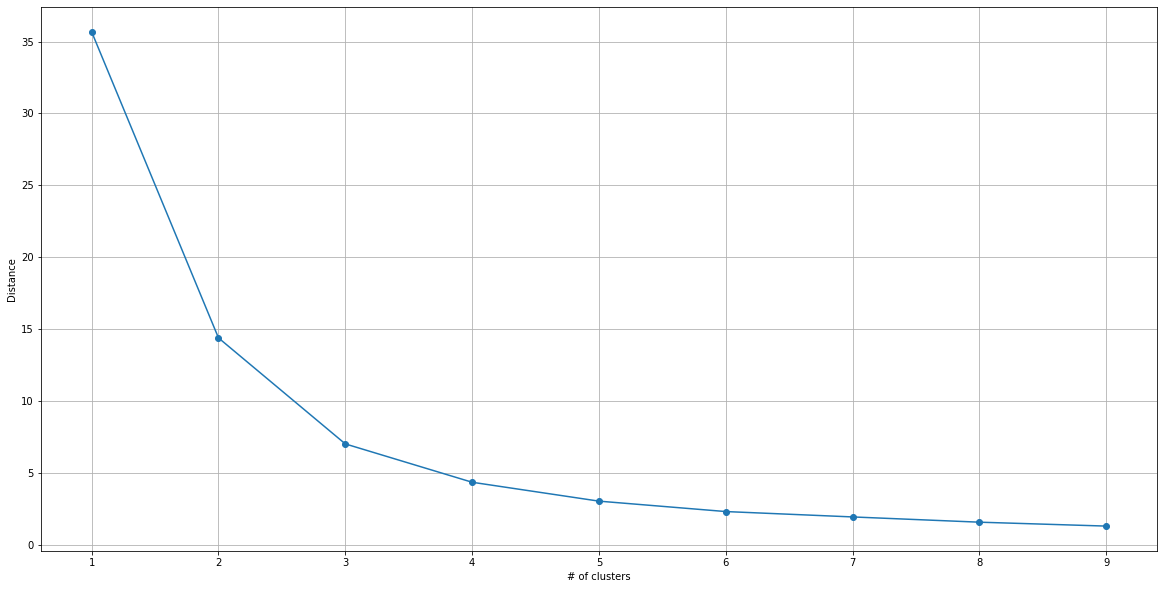

In [12]:
optimise_k_means(ds[['G3','G12avg']],10)

In [5]:
kmeans = KMeans(n_clusters=5)

In [6]:
kmeans.fit(ds[['G3','G12avg']])

KMeans(n_clusters=5)

In [7]:
ds['cluster']= kmeans.labels_

In [8]:
ds

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,G12avg,cluster
0,0,0,0.428571,1,0,0,1.00,1.00,0.00,1.00,...,0.75,0.00,0.00,0.50,0.080000,0.1250,0.315789,0.30,0.220395,1
1,0,0,0.285714,1,0,1,0.25,0.25,0.00,0.50,...,0.50,0.00,0.00,0.50,0.053333,0.1250,0.263158,0.30,0.194079,1
2,0,0,0.000000,1,1,1,0.25,0.25,0.00,0.50,...,0.25,0.25,0.50,0.50,0.133333,0.2500,0.421053,0.50,0.335526,2
3,0,0,0.000000,1,0,1,1.00,0.50,0.25,0.75,...,0.25,0.00,0.00,1.00,0.026667,0.7500,0.736842,0.75,0.743421,4
4,0,0,0.142857,1,0,1,0.75,0.75,0.50,0.50,...,0.25,0.00,0.25,1.00,0.053333,0.1875,0.526316,0.50,0.356908,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,0.714286,1,1,0,0.50,0.50,0.75,0.75,...,0.75,0.75,1.00,0.75,0.146667,0.3750,0.473684,0.45,0.424342,2
391,1,1,0.285714,1,1,1,0.75,0.25,0.75,0.75,...,1.00,0.50,0.75,0.25,0.040000,0.6875,0.842105,0.80,0.764803,4
392,1,1,0.857143,0,0,1,0.25,0.25,0.50,0.50,...,0.50,0.50,0.50,0.50,0.040000,0.4375,0.421053,0.35,0.429276,1
393,1,1,0.428571,0,1,1,0.75,0.50,0.75,0.50,...,0.00,0.50,0.75,1.00,0.000000,0.5000,0.631579,0.50,0.565789,2


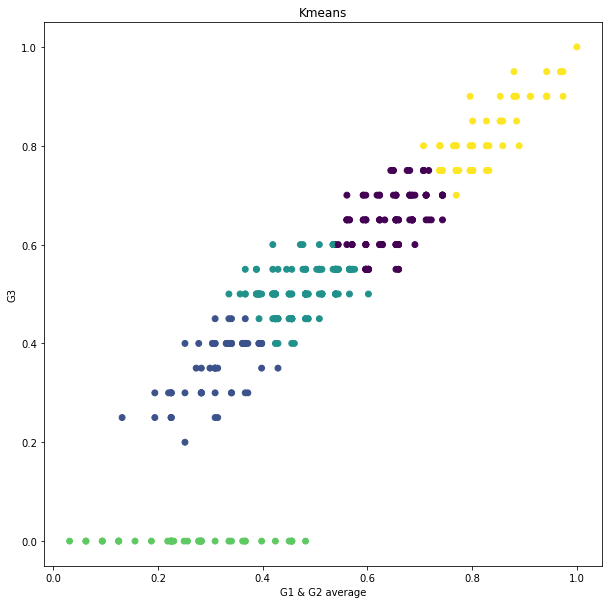

In [9]:
fig= plt.subplots(figsize=(10,10))
plt.scatter(x=ds['G12avg'],y=ds['G3'],c=ds['cluster'],s=35)
plt.title("Kmeans")
plt.xlabel('G1 & G2 average')
plt.ylabel('G3')
plt.show()